In [1]:
import numpy as np 
import pandas as pd

In [2]:
column_names = ['user_id','item_id','rating','timestamp']

In [3]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100003 non-null  int64
 1   item_id    100003 non-null  int64
 2   rating     100003 non-null  int64
 3   timestamp  100003 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
movie_titles['title'].nunique()

1664

In [9]:
df = pd.merge(df,movie_titles,on='item_id')

In [10]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [12]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [13]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [14]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [15]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [16]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [17]:
ratings.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          1664 non-null   float64
 1   no. of ratings  1664 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 39.0+ KB


In [19]:
import cufflinks as cf
cf.go_offline()

In [20]:
ratings[ratings['no. of ratings'] > 500]

,rating,no. of ratings
title,,
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Star Wars (1977),4.359589,584


In [21]:
ratings['no. of ratings'].iplot(kind='hist',bins=70, colors='henanigans_purple1',
                               xTitle='num of ratings')

In [22]:
ratings['rating'].iplot(kind='hist',bins=70,colors='henanigans_purple1')

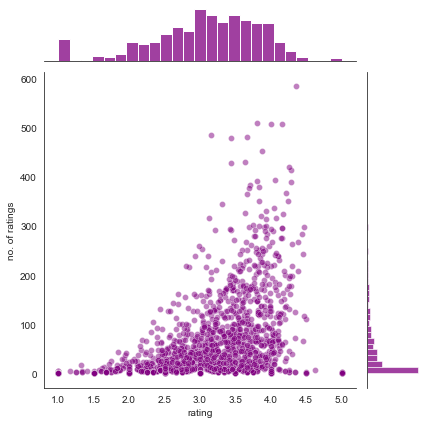

In [23]:
sns.jointplot(x=ratings['rating'],y=ratings['no. of ratings'],data=ratings
             ,alpha=0.5,color='purple')

In [24]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')

In [25]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
ratings.sort_values('no. of ratings', ascending=False).head(10)

,rating,no. of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [27]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [28]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [29]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide



In [30]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [31]:
moviemat.corrwith(starwars_user_ratings)

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [32]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [33]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [34]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])

In [35]:
corr_starwars.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [36]:
corr_starwars[corr_starwars['no. of ratings'] > 100].sort_values(
    'Correlation',ascending=False,).head(5)

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [37]:
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [38]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide



In [39]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [40]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [41]:
corr_liarliar.dropna(inplace=True)

In [42]:
corr_liarliar = corr_liarliar.join(ratings['no. of ratings'])

In [43]:
corr_liarliar[corr_liarliar['no. of ratings'] > 50].sort_values('Correlation',
                            ascending=False).head(10)

,Correlation,no. of ratings
title,,
Liar Liar (1997),1.000000,485
Casper (1995),0.538816,52
Batman & Robin (1997),0.532858,62
Batman Forever (1995),0.516968,114
Bean (1997),0.504689,91
Flubber (1997),0.494258,53
Dumb & Dumber (1994),0.494006,69
"Mask, The (1994)",0.484650,129
"Island of Dr. Moreau, The (1996)",0.477731,57


In [44]:
#LETS ATTEMPT BOOK RECOMMENDATIONS

In [45]:
books = pd.read_excel('BX-Books.xls')
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 16383 non-null  object
 1   Book-Title           16383 non-null  object
 2   Book-Author          14556 non-null  object
 3   Year-Of-Publication  14507 non-null  object
 4   Publisher            14507 non-null  object
 5   Image-URL-S          14247 non-null  object
 6   Image-URL-M          14247 non-null  object
 7   Image-URL-L          14247 non-null  object
 8   Unnamed: 8           1 non-null      object
dtypes: object(9)
memory usage: 1.1+ MB


In [46]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN


In [47]:
book_user = pd.read_excel('BX-Users.xls')
book_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      16383 non-null  int64 
 1   Unnamed: 1   16349 non-null  object
 2    Location ;  16368 non-null  object
 3   Unnamed: 3   16112 non-null  object
 4    Age         10160 non-null  object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   8 non-null      object
 7   Unnamed: 7   3 non-null      object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


In [48]:
book_user.head()

,User-ID,Unnamed: 1,Location ;,Unnamed: 3,Age,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,nyc,new york,usa,NaN,NaN,NaN,NaN
1,2,stockton,california,usa,18,NaN,NaN,NaN
2,3,moscow,yukon territory,russia,NaN,NaN,NaN,NaN
3,4,porto,v.n.gaia,portugal,17,NaN,NaN,NaN
4,5,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN


In [49]:
book_ratings = pd.read_excel('BX-Book-Ratings.xls')
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      16383 non-null  int64 
 1   ISBN         16383 non-null  object
 2   Book-Rating  16383 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 384.1+ KB


In [50]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [51]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L',
            'Unnamed: 8'], axis=1, inplace=True)

In [52]:
books.isna().any()

ISBN                   False
Book-Title             False
Book-Author             True
Year-Of-Publication     True
Publisher               True
dtype: bool

<AxesSubplot:>

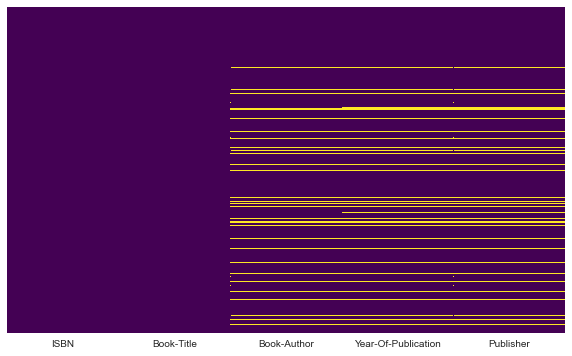

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(books.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 16383 non-null  object
 1   Book-Title           16383 non-null  object
 2   Book-Author          14556 non-null  object
 3   Year-Of-Publication  14507 non-null  object
 4   Publisher            14507 non-null  object
dtypes: object(5)
memory usage: 640.1+ KB


In [55]:
books.dropna(inplace=True)

In [56]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14507 entries, 0 to 16382
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 14507 non-null  object
 1   Book-Title           14507 non-null  object
 2   Book-Author          14507 non-null  object
 3   Year-Of-Publication  14507 non-null  object
 4   Publisher            14507 non-null  object
dtypes: object(5)
memory usage: 680.0+ KB


In [57]:
book_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      16383 non-null  int64 
 1   Unnamed: 1   16349 non-null  object
 2    Location ;  16368 non-null  object
 3   Unnamed: 3   16112 non-null  object
 4    Age         10160 non-null  object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   8 non-null      object
 7   Unnamed: 7   3 non-null      object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


In [58]:
book_user.head()

,User-ID,Unnamed: 1,Location ;,Unnamed: 3,Age,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,nyc,new york,usa,NaN,NaN,NaN,NaN
1,2,stockton,california,usa,18,NaN,NaN,NaN
2,3,moscow,yukon territory,russia,NaN,NaN,NaN,NaN
3,4,porto,v.n.gaia,portugal,17,NaN,NaN,NaN
4,5,farnborough,hants,united kingdom,NaN,NaN,NaN,NaN


<AxesSubplot:>

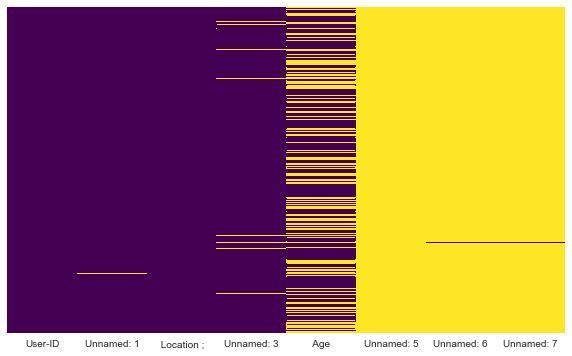

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(book_user.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
book_user.drop(['Unnamed: 6','Unnamed: 7','Unnamed: 5'],axis=1,inplace=True)

In [61]:
book_user.head()

,User-ID,Unnamed: 1,Location ;,Unnamed: 3,Age
0,1,nyc,new york,usa,NaN
1,2,stockton,california,usa,18
2,3,moscow,yukon territory,russia,NaN
3,4,porto,v.n.gaia,portugal,17
4,5,farnborough,hants,united kingdom,NaN


In [62]:
book_user['City'] = book_user['Unnamed: 1']
book_user['Country'] = book_user ['Unnamed: 3']
book_user['Location'] = book_user[' Location ;']

In [63]:
del book_user[' Location ;']
del book_user['Unnamed: 3']

In [64]:
book_user.head()

,User-ID,Unnamed: 1,Age,City,Country,Location
0,1,nyc,NaN,nyc,usa,new york
1,2,stockton,18,stockton,usa,california
2,3,moscow,NaN,moscow,russia,yukon territory
3,4,porto,17,porto,portugal,v.n.gaia
4,5,farnborough,NaN,farnborough,united kingdom,hants


<AxesSubplot:>

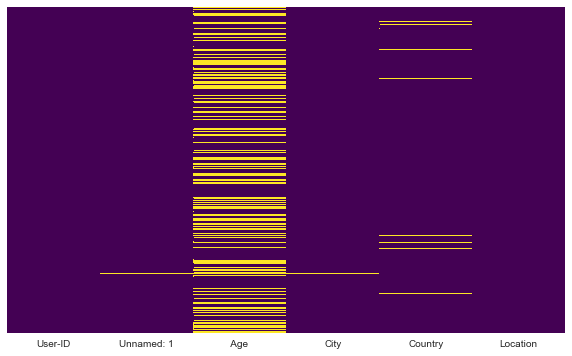

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(book_user.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [66]:
cols = list(book_user.columns.values)

In [67]:
cols

['User-ID', 'Unnamed: 1', ' Age ', 'City', 'Country', 'Location']

In [68]:
book_user = book_user[['User-ID', ' Age ', 'City', 'Location', 'Country']]

In [69]:
book_user.head()

,User-ID,Age,City,Location,Country
0,1,NaN,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [70]:
book_user['Location'].dropna(inplace=True)

In [71]:
book_user.head()

,User-ID,Age,City,Location,Country
0,1,NaN,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [72]:
book_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User-ID   16383 non-null  int64 
 1    Age      10160 non-null  object
 2   City      16349 non-null  object
 3   Location  16368 non-null  object
 4   Country   16112 non-null  object
dtypes: int64(1), object(4)
memory usage: 640.1+ KB


In [73]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      16383 non-null  int64 
 1   ISBN         16383 non-null  object
 2   Book-Rating  16383 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 384.1+ KB


In [74]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14507 entries, 0 to 16382
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 14507 non-null  object
 1   Book-Title           14507 non-null  object
 2   Book-Author          14507 non-null  object
 3   Year-Of-Publication  14507 non-null  object
 4   Publisher            14507 non-null  object
dtypes: object(5)
memory usage: 680.0+ KB


In [75]:
#The features I want to use for my recommender system
#UserID, City, Book rating, ISBN, Book Title, Author, Year of Publication, Publisher

In [76]:
book_data = books.merge(book_ratings)

In [77]:
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0


In [78]:
book_data['User-ID'].nunique()

1231

In [79]:
book_data['Other User ID'] = book_user['User-ID']

In [80]:
book_data["Country"] = book_user['Country']

In [81]:
book_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Other User ID,Country
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,1,usa
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,2,usa
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,3,russia
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,4,portugal
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,5,united kingdom
...,...,...,...,...,...,...,...,...,...
6617,879978570,Thendara House,Marion Zimm Bradley,1983,Penguin Putnam~trade,2276,0,6677,indonesia
6618,671440349,SWORD IS FORGED,Evangeline Walton,1984,Pocket,2276,0,6678,canada
6619,553291165,Raising the Stones,Sheri S. Tepper,1991,Spectra Books,2276,0,6679,usa
6620,671632671,BATTLESTATIONS 31 (Star Trek (Numbered Paperba...,Diane L. Carey,1986,Star Trek,2276,0,6680,usa


In [82]:
book_data['Other User ID'].nunique()

6622

In [83]:
book_data['Country'].isna().any()

True

In [84]:
book_data.dropna(inplace=True)

In [85]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6506 entries, 0 to 6621
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 6506 non-null   object
 1   Book-Title           6506 non-null   object
 2   Book-Author          6506 non-null   object
 3   Year-Of-Publication  6506 non-null   object
 4   Publisher            6506 non-null   object
 5   User-ID              6506 non-null   int64 
 6   Book-Rating          6506 non-null   int64 
 7   Other User ID        6506 non-null   int64 
 8   Country              6506 non-null   object
dtypes: int64(3), object(6)
memory usage: 508.3+ KB


<AxesSubplot:>

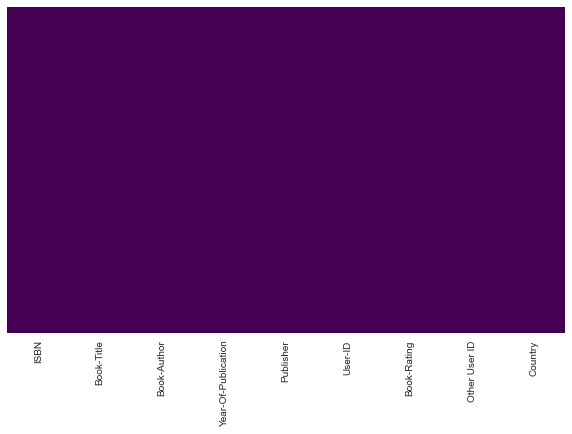

In [86]:
plt.figure(figsize=(10,6))
sns.heatmap(book_data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [87]:
del book_data['User-ID']

In [88]:
book_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Book-Rating', 'Other User ID', 'Country'],
      dtype='object')

In [89]:
book_data = book_data[['Other User ID', 'Country','ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Book-Rating']]

In [90]:
book_data = book_data.rename(columns={'Other User ID':'User ID'})

In [91]:
book_data.head(10)

,User ID,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,1,usa,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,2,usa,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,3,russia,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0
3,4,portugal,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0
4,5,united kingdom,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0
5,6,usa,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,0
6,7,usa,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,0
7,8,canada,671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,0
8,9,usa,679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,0
9,10,spain,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,5


In [92]:
import cufflinks as cf
cf.go_offline()

In [93]:
book_data['Book-Rating'].iplot(kind='hist',bins=30)

In [94]:
book_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)

Book-Title
Wild Animus                                                  33
The Lovely Bones: A Novel                                    17
The Street Lawyer                                            15
The Da Vinci Code                                            12
The Joy Luck Club                                            12
                                                             ..
Shes Leaving Home                                             1
Sheltie Saves The Day (Sheltie)                               1
Sheldon &amp; Mrs. Levine: An Excruciating Correspondence     1
She's Not What She Seems (Sweet Valley High No. 92)           1
253                                                           1
Name: Book-Rating, Length: 4693, dtype: int64

In [95]:
book_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False)

Book-Title
Intercultural Interactions : A Practical Guide (Cross Cultural Research and Methodology)    10.0
A Whack on the Side of the Head: How You Can Be More Creative                               10.0
Golden Threads (Lucky in Love No. 14)                                                       10.0
The Silmarillion                                                                            10.0
Damnation Alley                                                                             10.0
                                                                                            ... 
Poisonwood Bible Edition Uk                                                                  0.0
Point of Origin                                                                              0.0
Poetics of the New American Poetry                                                           0.0
Plum Island                                                                                  0.0
253                

In [96]:
book_data.groupby('Country')['Book-Rating'].count().sort_values(ascending=False)

Country
 usa                2910
 spain               524
 canada              421
 italy               408
 united kingdom      395
                    ... 
 morogoro              1
 mozambique            1
 n/a                   1
 netherlands           1
 afghanistan           1
Name: Book-Rating, Length: 163, dtype: int64

In [97]:
ratings = pd.DataFrame(book_data.groupby('Book-Title')['Book-Rating'].mean())

In [98]:
ratings['No. of ratings'] = pd.DataFrame(book_data.groupby('Book-Title')['Book-Rating'].count())

In [99]:
ratings = ratings.sort_values(by='No. of ratings',ascending=False)

In [100]:
ratings.head(10)

,Book-Rating,No. of ratings
Book-Title,,
Wild Animus,0.818182,33
The Lovely Bones: A Novel,3.647059,17
The Street Lawyer,3.333333,15
The Da Vinci Code,6.500000,12
The Joy Luck Club,3.916667,12
The Red Tent (Bestselling Backlist),4.818182,11
The Secret Life of Bees,6.272727,11
The Notebook,2.818182,11
Isle of Dogs,2.100000,10


In [101]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4693 entries, Wild Animus to Nighttime Guardian (Harlequin Intrigue 607)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book-Rating     4693 non-null   float64
 1   No. of ratings  4693 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.0+ KB


In [102]:
ratings[ratings['No. of ratings'] >= 10]

,Book-Rating,No. of ratings
Book-Title,,
Wild Animus,0.818182,33
The Lovely Bones: A Novel,3.647059,17
The Street Lawyer,3.333333,15
The Da Vinci Code,6.500000,12
The Joy Luck Club,3.916667,12
The Red Tent (Bestselling Backlist),4.818182,11
The Secret Life of Bees,6.272727,11
The Notebook,2.818182,11
Isle of Dogs,2.100000,10


In [103]:
ratings['No. of ratings'].iplot(kind='hist',bins=50)

In [104]:
ratings['Book-Rating'].iplot(kind='hist',bins=50)

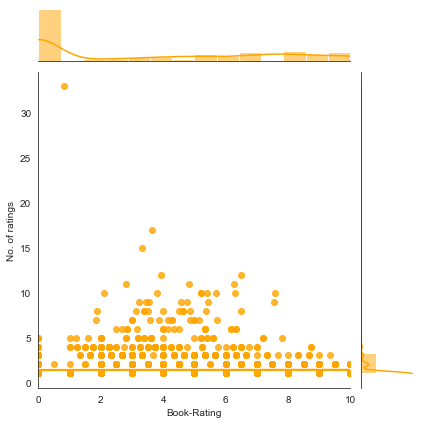

In [105]:
sns.jointplot(x='Book-Rating',y='No. of ratings',data=ratings,kind='reg',
             color='orange')

In [106]:
book_data.head()

,User ID,Country,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,1,usa,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,2,usa,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,3,russia,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0
3,4,portugal,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0
4,5,united kingdom,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,0


In [107]:
bookpivot = book_data.pivot_table(values='Book-Rating',index='User ID',
                                 columns='Book-Title')

In [108]:
bookpivot.head()

Book-Title,253,1984,01-01-00: A Novel of the Millennium,100 Best-Loved Poems (Dover Thrift Editions),101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,101 Telephone Jokes,11th Hour,13 99 Euros,1st to Die: A Novel,...,Zen and the art of motorcycle maintenance : an inquiry into values,Zen in the Art of Archery (Vintage Spiritual Classics),Zen: A Way of Life (Teach Yourself Books),Zlateh the Goat and Other Stories,Zodiac: The Eco-Thriller,Zoot Suit and Other Plays,"\I Won't Learn from You\"": And Other Thoughts on Creative Maladjustment""","\O\"" Is for Outlaw""",iI Paradiso Degli Orchi,stardust
User ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
ratings.sort_values('No. of ratings',ascending=False).head(10)

,Book-Rating,No. of ratings
Book-Title,,
Wild Animus,0.818182,33
The Lovely Bones: A Novel,3.647059,17
The Street Lawyer,3.333333,15
The Da Vinci Code,6.500000,12
The Joy Luck Club,3.916667,12
The Red Tent (Bestselling Backlist),4.818182,11
The Secret Life of Bees,6.272727,11
The Notebook,2.818182,11
Summer Sisters,5.200000,10


In [110]:
wildanimus_ratings = bookpivot['Wild Animus']
lifeofpi_ratings = bookpivot['Life of Pi']
davincicode_ratings = bookpivot['The Da Vinci Code']

In [111]:
similar_to_wildanimus = bookpivot.corrwith(wildanimus_ratings)

In [112]:
similar_to_wildanimus

Book-Title
253                                                                        NaN
1984                                                                       NaN
01-01-00: A Novel of the Millennium                                        NaN
100 Best-Loved Poems (Dover Thrift Editions)                               NaN
101 Bright Ideas: Esl Activities for All Ages                              NaN
                                                                            ..
Zoot Suit and Other Plays                                                  NaN
\I Won't Learn from You\": And Other Thoughts on Creative Maladjustment"   NaN
\O\" Is for Outlaw"                                                        NaN
iI Paradiso Degli Orchi                                                    NaN
stardust                                                                   NaN
Length: 4693, dtype: float64

In [113]:
corr_wildanimus = pd.DataFrame(similar_to_wildanimus,columns=['Correlate'])
corr_wildanimus.dropna(inplace=True)

In [114]:
corr_wildanimus

,Correlate
Book-Title,
Wild Animus,1.0
